In [1]:
# load data
! ls -latr ../data/*.csv
# Añadimos un segundo remoto al original, para trabajar con los datos actualizados
! git remote add original git@github.com:Eclectikus/COVID-19.git
! git pull -f original master

-rw-r--r--  1 jaimevalero  staff  500 23 mar 09:16 ../data/covi0503.csv
-rw-r--r--  1 jaimevalero  staff  497 23 mar 09:16 ../data/covi0603.csv
-rw-r--r--  1 jaimevalero  staff  510 23 mar 09:16 ../data/covi0903.csv
-rw-r--r--  1 jaimevalero  staff  513 23 mar 09:16 ../data/covi1003.csv
-rw-r--r--  1 jaimevalero  staff  521 23 mar 09:16 ../data/covi1103.csv
-rw-r--r--  1 jaimevalero  staff  525 23 mar 09:16 ../data/covi1203.csv
-rw-r--r--  1 jaimevalero  staff  534 23 mar 09:16 ../data/covi1303.csv
-rw-r--r--  1 jaimevalero  staff  552 23 mar 09:16 ../data/covi1603.csv
-rw-r--r--  1 jaimevalero  staff  565 23 mar 09:16 ../data/covi1703.csv
-rw-r--r--  1 jaimevalero  staff  568 23 mar 09:16 ../data/covi1803.csv
-rw-r--r--  1 jaimevalero  staff  576 23 mar 09:16 ../data/covi1903.csv
-rw-r--r--  1 jaimevalero  staff  584 23 mar 09:16 ../data/covi2003.csv
-rw-r--r--  1 jaimevalero  staff  742 23 mar 09:16 ../data/covi2103.csv
-rw-r--r--  1 jaimevalero  staff  746 23 mar 09:16 ../data/covi2

In [2]:
# Load Data
import glob 
import pandas as pd

def Carga_All_Files( ):
    regexp='../data/covi*'
    df = pd.DataFrame()
    # Iterate trough LIST DIR and 
    for my_file in glob.glob(regexp):
        this_df = pd.read_csv(my_file)
        this_df['Fecha'] = my_file
        df = pd.concat([df,this_df])
    return df  

df = Carga_All_Files( )

df.tail()


,ID,CCAA,Casos,IA,UCI,Fallecidos,Hospitalizados,Nuevos,Curados,Fecha
13,942,Madrid,1388,20.77,135,56,NaN,NaN,NaN,../data/covi1203.csv
14,952,Murcia,26,1.74,1,0,NaN,NaN,NaN,../data/covi1203.csv
15,943,Navarra,73,11.16,3,0,NaN,NaN,NaN,../data/covi1203.csv
16,950,País Vasco,346,15.67,18,11,NaN,NaN,NaN,../data/covi1203.csv
17,949,La Rioja,205,64.71,1,2,NaN,NaN,NaN,../data/covi1203.csv


In [3]:
# Formateamos la fecha
df['Fecha'].replace({
    '../data/covi': '2020-',
    '.csv'        : ''}, inplace=True, regex=True)

df['Fecha'] =  pd.to_datetime(df['Fecha'], format='%Y-%d%m')



In [4]:
# Trabajamos solo con una comunidad

COMUNIDAD_A_CONSIDERAR = 'Madrid'
comunidad = df[(df['CCAA'] == COMUNIDAD_A_CONSIDERAR)].sort_values(by='Fecha')
del comunidad['ID']
del comunidad['IA']


comunidad.set_index('Fecha', inplace=True)
#
comunidad
comunidad


,CCAA,Casos,UCI,Fallecidos,Hospitalizados,Nuevos,Curados
Fecha,,,,,,,
2020-03-05,Madrid,90,2,1,NaN,NaN,NaN
2020-03-06,Madrid,137,2,2,NaN,NaN,NaN
2020-03-09,Madrid,469,53,8,NaN,NaN,NaN
2020-03-10,Madrid,782,77,21,NaN,NaN,NaN
2020-03-11,Madrid,1024,102,31,NaN,NaN,NaN
2020-03-12,Madrid,1388,135,56,NaN,NaN,NaN
2020-03-13,Madrid,1990,180,81,NaN,NaN,NaN
2020-03-16,Madrid,4165,253,213,NaN,NaN,NaN
2020-03-17,Madrid,4871,340,355,NaN,NaN,NaN


In [7]:
import numpy as np

# Datos de fallecimientos diarios, en totales y tanto por uno.
comunidad['Fallecidos hoy absoluto'] = comunidad['Fallecidos'] - comunidad['Fallecidos'].shift(1)
comunidad['Fallecidos hoy porcentaje'] = comunidad['Fallecidos hoy absoluto']  / comunidad['Fallecidos'] 

comunidad['Fallecidos hoy variacion diferencia'] = comunidad['Fallecidos hoy absoluto'] - comunidad['Fallecidos hoy absoluto'].shift(1)


CONVERT_INT_COLUMNS = ['Fallecidos hoy absoluto', 'Fallecidos hoy porcentaje']
for column in CONVERT_INT_COLUMNS :
    comunidad[column] = comunidad[column].fillna(0)
    comunidad[column] = comunidad[column].astype(np.int64)

comunidad



,CCAA,Casos,UCI,Fallecidos,Hospitalizados,Nuevos,Curados,Fallecidos hoy absoluto,Fallecidos hoy porcentaje,Fallecidos hoy variacion diferencia
Fecha,,,,,,,,,,
2020-03-05,Madrid,90,2,1,NaN,NaN,NaN,0,0,NaN
2020-03-06,Madrid,137,2,2,NaN,NaN,NaN,1,0,NaN
2020-03-09,Madrid,469,53,8,NaN,NaN,NaN,6,0,5.0
2020-03-10,Madrid,782,77,21,NaN,NaN,NaN,13,0,7.0
2020-03-11,Madrid,1024,102,31,NaN,NaN,NaN,10,0,-3.0
2020-03-12,Madrid,1388,135,56,NaN,NaN,NaN,25,0,15.0
2020-03-13,Madrid,1990,180,81,NaN,NaN,NaN,25,0,0.0
2020-03-16,Madrid,4165,253,213,NaN,NaN,NaN,132,0,107.0
2020-03-17,Madrid,4871,340,355,NaN,NaN,NaN,142,0,10.0


Fecha
2020-03-05    0
2020-03-06    0
2020-03-09    0
2020-03-10    0
2020-03-11    0
2020-03-12    0
2020-03-13    0
2020-03-16    0
2020-03-17    0
2020-03-18    0
2020-03-19    0
2020-03-20    0
2020-03-21    0
2020-03-22    0
2020-03-23    0
2020-03-24    0
Name: Fallecidos hoy porcentaje, dtype: int64

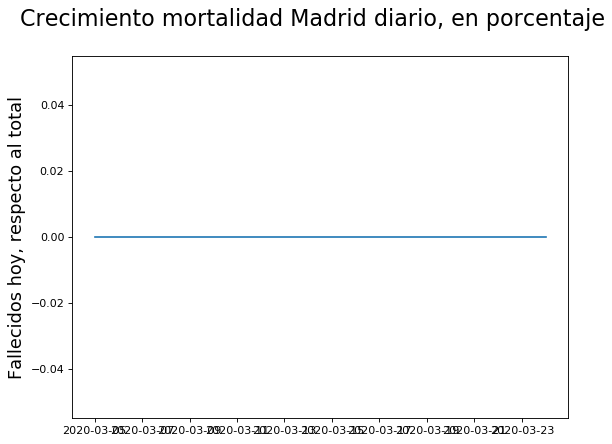

In [8]:
# Grafica

from matplotlib import pyplot as plt    

fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot( comunidad['Fallecidos hoy porcentaje'])
fig.suptitle('Crecimiento mortalidad '+COMUNIDAD_A_CONSIDERAR+' diario, en porcentaje', fontsize=20)
plt.ylabel('Fallecidos hoy, respecto al total', fontsize=16)

comunidad['Fallecidos hoy porcentaje']

Fecha
2020-03-05      0
2020-03-06      1
2020-03-09      6
2020-03-10     13
2020-03-11     10
2020-03-12     25
2020-03-13     25
2020-03-16    132
2020-03-17    142
2020-03-18     35
2020-03-19    108
2020-03-20    130
2020-03-21    176
2020-03-22    217
2020-03-23    242
2020-03-24    272
Name: Fallecidos hoy absoluto, dtype: int64

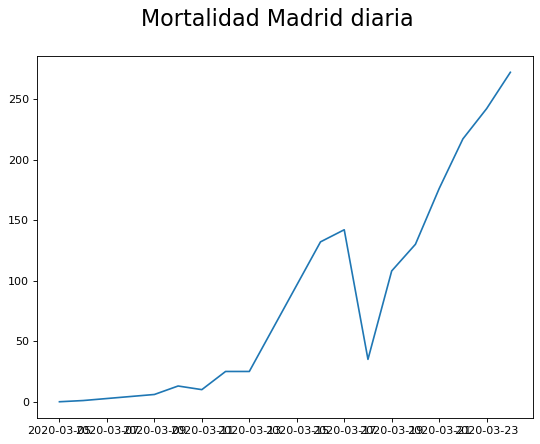

In [9]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(comunidad['Fallecidos hoy absoluto']) 
fig.suptitle('Mortalidad '+COMUNIDAD_A_CONSIDERAR+' diaria', fontsize=20)

comunidad['Fallecidos hoy absoluto']